# K-Means Clustering
### Weekly Meeting ML Demo 01 (10-12)
---



## **K-means Clustering:**

Clustering algorithms work to seperate data into groups based on the similarity between samples. The **k-means** algorithm takes **`N`** data points and divides them into **`K`** groups by assigning points to the nearest centriod in euclidean space. 

We start by assigning centriods to pseudo-random samples in our set, then assign each point in the set to the nearest centroid. This initialization creates our first clusters of data, but they are assigned with no great significance yet. We run the same process again, but the centroids are represented by the mean of each group. 

We'll implement this algorithm in three levels of descending complexity:
- `numpy` (from scratch)
- `tensorflow` (assisted algorithms)
- `scikit` (entirely automated)

In [3]:
# Start by installing the nessecary Python modules
!pip install tensorflow
!pip install matplotlib
!pip install scikit-learn
!pip instal seaborn

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 320.4 MB 9.7 MB/s 
     |████████████████████████████████| 65 kB 1.0 MB/s 
  Using cached termcolor-1.1.0.tar.gz (3.9 kB)
Processing /home/stephen/.cache/pip/wheels/32/42/7f/23cae9ff6ef66798d00dc5d659088e57dbba01566f6c60db63/wrapt-1.12.1-cp36-cp36m-linux_x86_64.whl
     |████████████████████████████████| 6.8 MB 6.8 MB/s 
     |████████████████████████████████| 1.3 MB 5.0 MB/s 
  Using cached gast-0.3.3-py2.py3-none-any.whl (9.7 kB)
     |████████████████████████████████| 3.8 MB 4.3 MB/s 
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
     |████████████████████████████████| 127 kB 16.8 MB/s 
     |████████████████████████████████| 459 kB 10.7 MB/s 
     |████████████████████████████████| 2.9 MB 7.7 MB/s 
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached requests-2.24.0-py2.py3-none-any.whl (61 kB)
  Using cached google_auth_oauthlib-

## `numpy`

We'll have to write most of our components from scratch here, but we can see the implementation at each step. 

In [2]:
""" Declare the Kmeans components as callable functions. """
import numpy as np # One library only, for vector manipulation.

def init_centroids(points, k): # [2]
    """returns k centroids from the initial points"""
    centroids = points.copy()
    np.random.shuffle(centroids)
    return centroids[:k]

def closest_centroid(points, centroids): # [2]
    """returns an array containing the index to the nearest centroid for each point"""
    distances = np.sqrt(((points - centroids[:, np.newaxis])**2).sum(axis=2))
    return np.argmin(distances, axis=0)

def move_centroids(points, closest, centroids): # [2]
    """returns the new centroids assigned from the points closest to them"""
    return np.array([points[closest==k].mean(axis=0) for k in range(centroids.shape[0])])

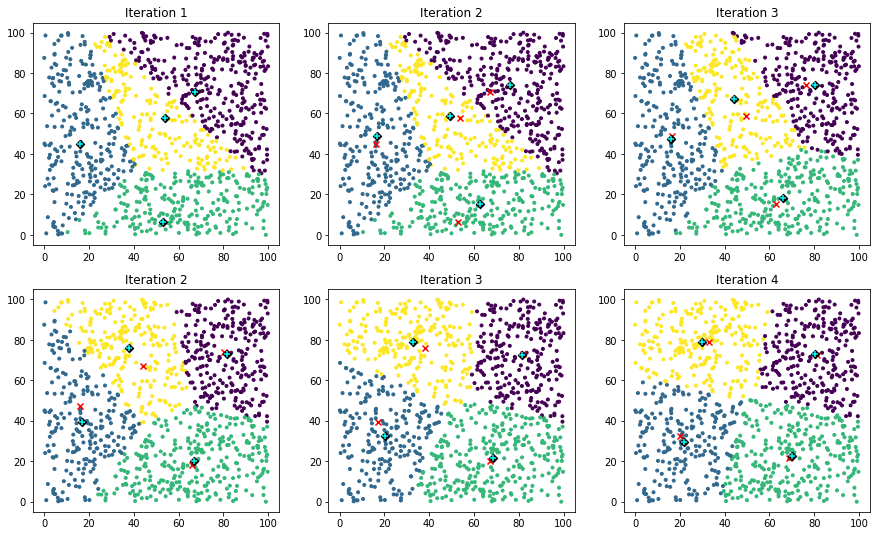

In [29]:
import matplotlib.pyplot as plt # Helps plot our data

# The number of clusters we want to group our data into
clustersK = 4

# The number of points to cluster
numPoints = 1000

# Generate coordinate (x,y) points over a normal distribution with values 0-100 
points = np.random.uniform(0, 100, [numPoints, 2])

# Select Random Centroids
centroids = init_centroids(points, clustersK)


# Prepare plotting
fig, axs = plt.subplots(2, 3, figsize=(15, 9))

# We're nesting loops to make plotting easier
for row in range(2):
    for col in range(3):

        # Produces a list representing the centroid closest to each point
        closest = closest_centroid(points, centroids)
        
        # More plotting here.
        if (row+col) == 0:  
            axs[row, col].scatter(x=points[:,0], y=points[:,1], c=closest, marker='.')
        
        else:
            # Show all points seperated into clusters by color
            axs[row, col].scatter(x=points[:,0], y=points[:,1], c=closest, marker='.')
            axs[row, col].scatter(x=centroids[:,0], y=centroids[:,1], c='red', marker='x')
            
            # Update the Centroids to the mean, or center, of their cluster
            centroids = move_centroids(points, closest, centroids)
        
        # Show centroids in black and cyan diamonds
        axs[row, col].scatter(x=centroids[:,0], y=centroids[:,1], c='black', marker='D')
        axs[row, col].scatter(x=centroids[:,0], y=centroids[:,1], c='cyan', marker='+')
        
        # Title plot
        axs[row, col].set_title("Iteration {}".format(row+col+1))

plt.show('tight')

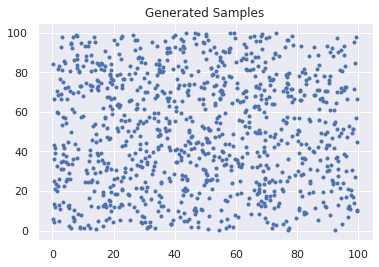

In [65]:
import numpy as np # Basic Python math library
import pandas as pd # Used to display metrics
import matplotlib.pyplot as plt # For plotting data

import tensorflow as tf 
tf.get_logger().setLevel('ERROR') # Here, we silence some tensorflow environment info printing.

# Sample Space Size
numPoints = 1000
# Number of clusters to parse
clustersK = 5

# Generate a random normal distribution of (x,y) coordinate points. 
points = np.random.uniform(0, 100, [numPoints, 2])

# Plot the generated set.
plt.scatter(points[:,0], points[:,1], marker='.')
plt.title("Generated Samples")
plt.show()

# Declare function to prepare our points as input for the k-means model. 
def input_fn(): 
  return tf.compat.v1.train.limit_epochs(tf.convert_to_tensor(points, dtype=tf.float32), num_epochs=1)

# Build the k-means clustering model from tensorflow.
kmeans = tf.compat.v1.estimator.experimental.KMeans(
    num_clusters=clustersK, use_mini_batch=False)

# Used for plotting, do not edit!
iter_idx = 0

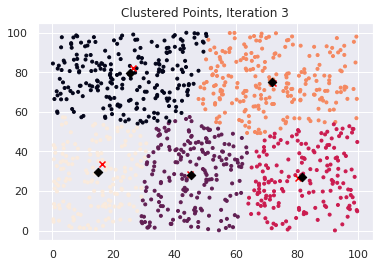

Iteration Report:
    Cluster  Points                  Center
 Cluster 01     230   (25.245264, 79.50515)
 Cluster 02     193  (45.412422, 28.220213)
 Cluster 03     172   (81.727905, 27.07345)
 Cluster 04     234   (71.969025, 74.80401)
 Cluster 05     171  (14.841794, 29.874891)


In [69]:
# Block 2 - Execute Clustering Iteratively

""" Execute k-means clustering operation over our generated point set. """
kmeans.train(input_fn)

""" After assigning labels to each of our points, we update the coordinates that represent each of our centroids. """
cluster_centers = kmeans.cluster_centers()

""" map the input points to their clusters """
cluster_indices = list(kmeans.predict_cluster_index(input_fn))

""" Plot: We can produce this iteration's clusters with matplotlib, coloring each point with the previously assigned hexcodes.""" 
plt.scatter(points[:,0], points[:,1], c=cluster_indices, marker='.')
if iter_idx != 0:
    plt.scatter(x=prev_centers[:,0], y=prev_centers[:,1], c='red', marker='x')
plt.scatter(x=cluster_centers[:,0], y=cluster_centers[:,1], c='black', marker='D')
plt.title("Clustered Points, Iteration {}".format(iter_idx))
plt.show()

""" Then, we pull some information on each of the groups, printing them cleanly with pandas. """
report = pd.DataFrame({
    'Cluster': ['Cluster {:02}'.format(i+1) for i in range(clustersK)],
    'Points': [cluster_indices.count(i)     for i in range(clustersK)],
    'Center': [tuple(cluster_centers[i])    for i in range(clustersK)]},
    index=None)


print("Iteration Report:")
print(report.to_string(index=False))

prev_centers = cluster_centers
iter_idx += 1


# Below, you will see the iteration results.
# On the first iteration, our centroids are randomly assigned; you'll see these in BLACK.
# Subsequent runs will show previous centroids in RED, so you can see how the clusters update.  
# To update, run this block again. 
# You'll know the clustering is successful when the red and black markers allign.


## Cluster Function (Tensorflow)

We'll use the code above to declare a k-means function that takes simple inputs and runs the k-means function over a set number of iterations.

We call the function `iterateKMeans()`.
It does nothing when we create it, so we must call the function below on our generated set of coordinate points. 

In [62]:
def iterateKMeans(clustersK, limit, data):
    """
    We can provide this function:

    clustersK: number of clusters to group 
    limit: number of iterations to run the k-means 
    points: sample set of 2d coordinate points
    
    and it will run the k-means and print all iterations.
    """
 
    def input_fn(): 
        return tf.compat.v1.train.limit_epochs(tf.convert_to_tensor(points, dtype=tf.float32), num_epochs=1)
    
    kmeans = tf.compat.v1.estimator.experimental.KMeans(
        num_clusters=clustersK, use_mini_batch=False)

    # Prepare dict for report
    iterationReport = {'Step': list(range(limit))}
    for c_idx in range(clustersK):
        iterationReport.update({'Cluster {}'.format(c_idx+1): []})

    # prepare fig
    fig, axs = plt.subplots(1, limit, figsize=(4*limit, 3.6))
    for iter_idx in range(limit):

        # apply clustering
        kmeans.train(input_fn)
        cluster_centers = kmeans.cluster_centers()
        cluster_indices = list(kmeans.predict_cluster_index(input_fn))

        # plot
        axs[iter_idx].scatter(points[:,0], points[:,1], c=cluster_indices, marker='.')
        if iter_idx != 0:
            axs[iter_idx].scatter(x=prev_centers[:,0], y=prev_centers[:,1], c='red', marker='D')
        axs[iter_idx].scatter(x=cluster_centers[:,0], y=cluster_centers[:,1], c='black', marker='D')

        # update dict for report
        for idx in range(clustersK):
            iterationReport['Cluster {}'.format(idx+1)].append("{} pts".format(cluster_indices.count(idx)))
        
        # save previous centers
        prev_centers = cluster_centers

    # plot collective iterations
    plt.suptitle("Clustering over Iterations")
    plt.show()

    # print report
    print("Report:")
    print(pd.DataFrame(iterationReport, index=None).to_string(index=False))


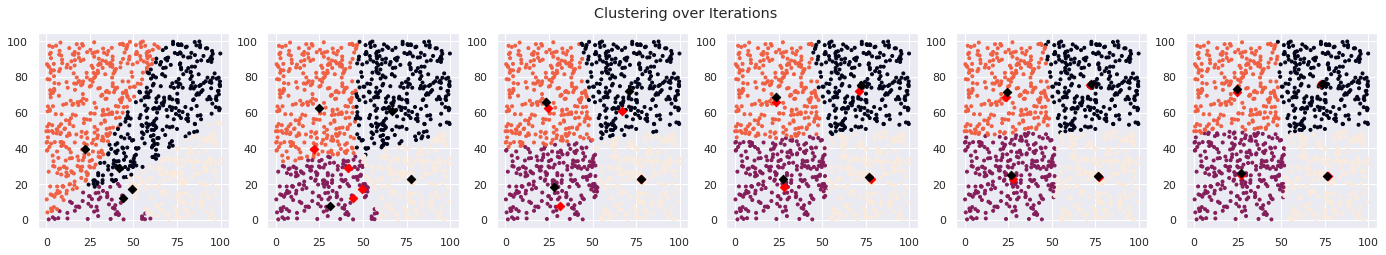

Report:
 Step Cluster 1 Cluster 2 Cluster 3 Cluster 4
    0   326 pts    58 pts   404 pts   212 pts
    1   309 pts   184 pts   305 pts   202 pts
    2   278 pts   224 pts   275 pts   223 pts
    3   268 pts   247 pts   255 pts   230 pts
    4   262 pts   259 pts   246 pts   233 pts
    5   259 pts   268 pts   239 pts   234 pts


In [63]:
""" Standard Normal Distribution """

# Generate a random normal distribution of (x,y) coordinate points. 
points = np.random.uniform(0, 100, [numPoints, 2])
iterateKMeans(clustersK=4, limit=6, data=points)

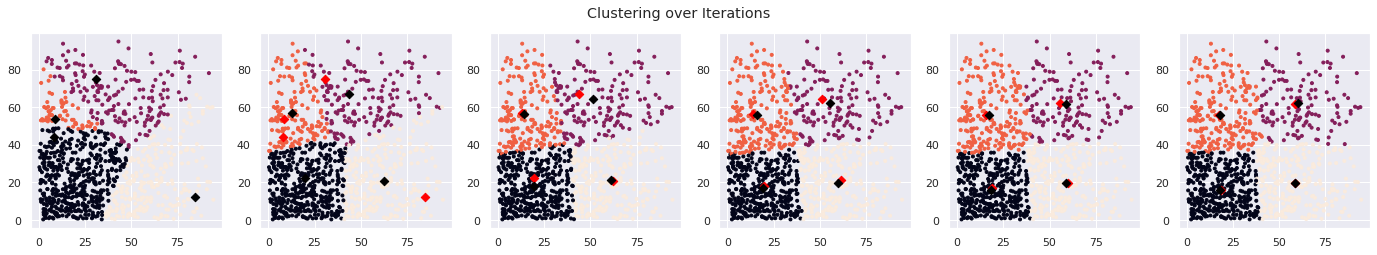

Report:
 Step Cluster 1 Cluster 2 Cluster 3 Cluster 4
    0   496 pts   183 pts    65 pts   256 pts
    1   427 pts   160 pts   154 pts   259 pts
    2   400 pts   161 pts   187 pts   252 pts
    3   377 pts   148 pts   214 pts   261 pts
    4   376 pts   137 pts   221 pts   266 pts
    5   376 pts   132 pts   225 pts   267 pts


In [64]:
""" Traingular Distribution """

points = np.random.triangular(0, 1, 100, [numPoints, 2])
iterateKMeans(clustersK=4, limit=6, data=points)

# Numpy

We can use the simple math library `numpy` to write the k-means clustering mostly from scratch. 

The functions below were written by [Florian LB](https://flothesof.github.io/k-means-numpy.html).

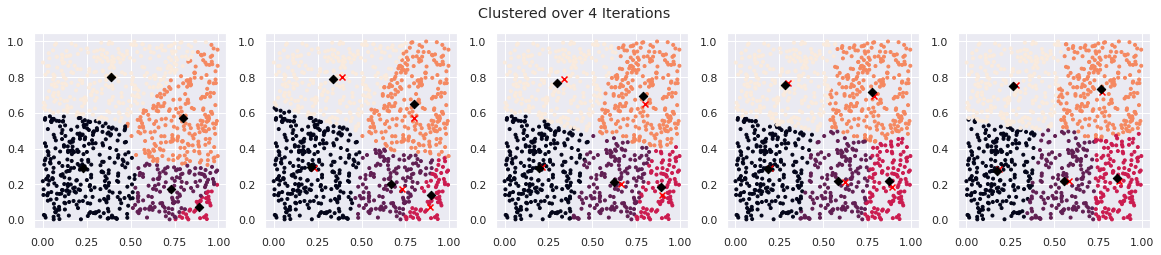

In [74]:
""" Now we can make a similar function to run the KMeans algorithm from scratch in python. """

def localKMeans(points, clustersK, iterations):
    # Initialize Random Centroids
    centroids = init_centroids(points, clustersK)

    fig, axs = plt.subplots(1, iterations, figsize=(4*iterations, 3.6))
    for iter_idx in range(iterations):

        # Update Clusters
        cluster_indices = closest_centroid(points, centroids)
        
        # Update Centroids
        prev_centroids = centroids
        centroids = move_centroids(points, cluster_indices, centroids)
        
        # Plot
        axs[iter_idx].scatter(points[:,0], points[:,1], c=cluster_indices, marker='.')
        if iter_idx != 0:
            axs[iter_idx].scatter(x=prev_centroids[:,0], y=prev_centroids[:,1], c='red', marker='x')
        axs[iter_idx].scatter(x=centroids[:,0], y=centroids[:,1], c='black', marker='D')
    
    plt.suptitle("Clustered over {} Iterations".format(iter_idx))
    plt.show()


numPoints = 1000
clustersK = 5

points = np.random.random([numPoints, 2])
localKMeans(points, clustersK, 5)
